In [140]:
import pandas

dat=pandas.read_csv("BankChurners.csv",  delimiter=",")

print(dat.eq(None).sum().sum())
print(dat.eq("Unknown").sum().sum())
print(dat.eq("NaN").sum().sum())
print(dat.eq("Unknown").sum())

numerical_list=['Customer_Age','Months_on_book','Total_Relationship_Count','Contacts_Count_12_mon','Credit_Limit',
                'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct',
                'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio',
                'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
categorical_list=['Attrition_Flag','Gender','Marital_Status']
ordinal_list=['Dependent_count', 'Education_Level', 'Income_Category', 'Card_Category','Months_Inactive_12_mon']

original_data=dat.copy()

0
3380
0
CLIENTNUM                                                                                                                                0
Attrition_Flag                                                                                                                           0
Customer_Age                                                                                                                             0
Gender                                                                                                                                   0
Dependent_count                                                                                                                          0
Education_Level                                                                                                                       1519
Marital_Status                                                                                                                         749
Income_Category   

In [209]:
dat=original_data.copy()

In [210]:
print(dat)

       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0    

I decided to unify the format first to be able to use median to replace unknown values

In [213]:
a=set()
for el in dat.columns:
    t=type(dat[el][0])
    a.add(t)
print(a,"\n")

lng=len(dat[el])

have_missing=set()

for el in dat.columns:
    t=type(dat[el][0])
    if t==str:
        print(el,t)
        if el in categorical_list:
            q=list(dict(dat[el].value_counts()).keys())
        else:
            q=[['Uneducated','High School', 'College','Graduate','Post-Graduate','Doctorate'],
              ['Less than $40K', '$40K - $60K','$60K - $80K', '$80K - $120K', '$120K +'],
              ['Blue', 'Silver', 'Gold', 'Platinum']]\
            [["Education_Level","Income_Category","Card_Category"].index(el)]
        for i in range (lng):
            if dat[el][i]=="Unknown":
                dat.at[i,el]=None
                have_missing.add(el)
            else:
                dat.at[i,el]=q.index(dat[el][i])
        print(dat[el])
        
a=set()
for el in dat.columns:
    t=type(dat[el][0])
    a.add(t)
print(a,"\n")


print(dat.isna().sum().sum())
unified_data_with_na=dat.copy()

{<class 'numpy.int64'>, <class 'numpy.float64'>, <class 'str'>} 

Attrition_Flag <class 'str'>
0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: object
Gender <class 'str'>
0        1
1        0
2        1
3        0
4        1
        ..
10122    1
10123    1
10124    0
10125    1
10126    0
Name: Gender, Length: 10127, dtype: object
Education_Level <class 'str'>
0           1
1           3
2           3
3           1
4           0
         ... 
10122       3
10123    None
10124       1
10125       3
10126       3
Name: Education_Level, Length: 10127, dtype: object
Marital_Status <class 'str'>
0           0
1           1
2           0
3        None
4           0
         ... 
10122       1
10123       3
10124       0
10125    None
10126       0
Name: Marital_Status, Length: 10127, dtype: object
Income_Category <class 'str'>
0        2
1        0
2        3
3        0
4   

In [259]:
dat=unified_data_with_na.copy()

find and filter out missing and incorrect values

In [260]:
from sklearn.linear_model import LinearRegression
import statistics

print(dat.isna().sum().sum())

dat_no_na=dat.dropna()

for el in have_missing:
    linreg=LinearRegression()
    idx=list(dat.columns).index(el)
    idlst=list(range(len(dat.columns)))
    idlst.remove(idx)
    tr_x=dat_no_na.iloc[:,idlst]
    tr_y=dat_no_na.iloc[:,[idx]]
    #print(tr_x.shape, tr_y.shape)
    linreg.fit(tr_x,tr_y)
    #print(tr_x.iloc[0,:],tr_y.iloc[0,:])
    
    data_for_pred=dat.iloc[:,idlst]
    
    for col in data_for_pred.columns:
        m=statistics.median([x for x in data_for_pred[col] if x!=None])
        q=len(data_for_pred[col])
        for i in range (q):
            if data_for_pred[col][i]==None:
                data_for_pred.at[i,col]=int(m)
            
    
    pred=linreg.predict(data_for_pred)
    #print(data_for_pred.iloc[0,:], pred[0])
    for i in range(len(pred)):
        #print(dat[el][i],pred[i])
        if dat[el][i]==None:
            dat.at[i,el]=round(pred[i][0])
    

print(dat.isna().sum().sum())

import statistics
All missing values are in ordinal data, so I decided to use median
for el in dat.columns:
    m=statistics.median([x for x in dat[el] if x!=None])
    q=len(dat[el])
    for i in range (q):
        if dat[el][i]==None:
            dat.at[i,el]=int(m)
print(dat)

3380
0


In [261]:
print(dat)

new_dat=dat.copy()

       CLIENTNUM Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383              0            45      1                3   
1      818770008              0            49      0                5   
2      713982108              0            51      1                3   
3      769911858              0            40      0                4   
4      709106358              0            40      1                3   
...          ...            ...           ...    ...              ...   
10122  772366833              0            50      1                2   
10123  710638233              1            41      1                2   
10124  716506083              1            44      0                1   
10125  717406983              1            30      1                2   
10126  714337233              1            43      0                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0                   1              0               2 

In [314]:
dat=new_dat.copy()

discover outliers and find a way to deal with them

Total_Amt_Chng_Q4_Q1 10127 -> 10069


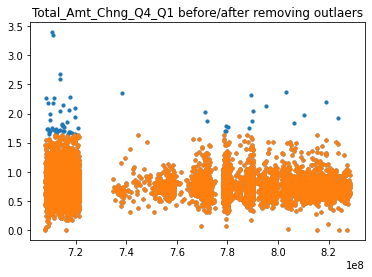

Total_Trans_Amt 10069 -> 10068


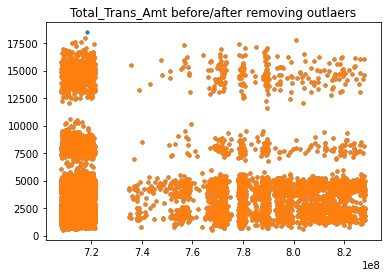

Total_Ct_Chng_Q4_Q1 10068 -> 10017


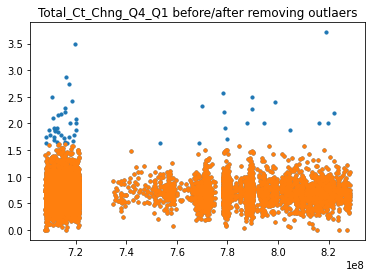

In [320]:
import numpy
from matplotlib import pyplot
cl_dat=dat.copy()

for el in list(numerical_list):
    a=len(cl_dat[el])
    #посмотрев на отсекаемые значения, я подобрал коэффициент 4
    cl_dat_1=cl_dat[numpy.abs(cl_dat[el]-cl_dat[el].mean())<=(4*cl_dat[el].std())]
    b=len(cl_dat_1[el])
    if a!=b:
        print(el,a,"->",b)
        matplotlib.pyplot.scatter(cl_dat["CLIENTNUM"],cl_dat[el],s=10);
        matplotlib.pyplot.title(el+" before/after removing outlaers");
        matplotlib.pyplot.scatter(cl_dat_1["CLIENTNUM"],cl_dat_1[el],s=10);
        matplotlib.pyplot.show();
    cl_dat=cl_dat_1

In [304]:
print(cl_dat)

       CLIENTNUM Attrition_Flag  Customer_Age Gender  Dependent_count  \
5      713061558              0            44      1                2   
10     708790833              0            42      1                5   
14     712396908              0            57      0                2   
19     709327383              0            45      0                2   
20     806165208              0            47      1                1   
...          ...            ...           ...    ...              ...   
10121  713899383              0            56      0                1   
10123  710638233              1            41      1                2   
10124  716506083              1            44      0                1   
10125  717406983              1            30      1                2   
10126  714337233              1            43      0                2   

      Education_Level Marital_Status Income_Category Card_Category  \
5                   3              0               1 